In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv(r'C:\Users\jaraneses\OneDrive - 2X LLC\Codes\Shopping Analysis\shopping_trends.csv')

In [4]:
data.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
data.shape

(3900, 19)

In [8]:
data.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

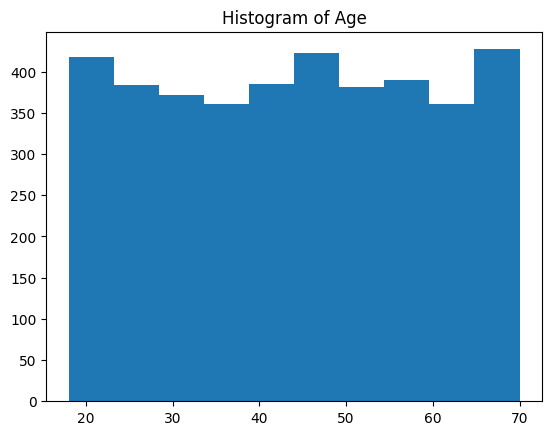

In [10]:
plt.hist(data['Age'])
plt.title('Histogram of Age')
plt.show()

In [11]:
data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

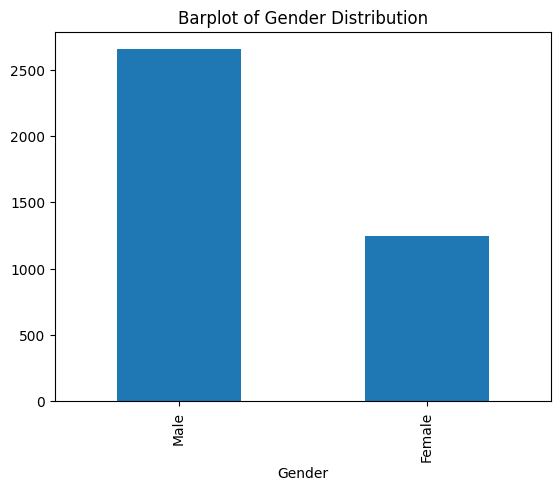

In [12]:
data['Gender'].value_counts().plot(kind ='bar')
plt.title('Barplot of Gender Distribution')
plt.show()

In [13]:
data.groupby('Category')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Category
Footwear       60.255426
Clothing       60.025331
Accessories    59.838710
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

In [14]:
data = data.sort_values('Review Rating', ascending = False)

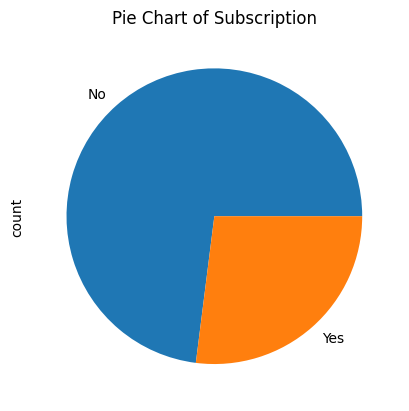

In [15]:
data['Subscription Status'].value_counts().plot(kind = 'pie')
plt.title('Pie Chart of Subscription')
plt.show()

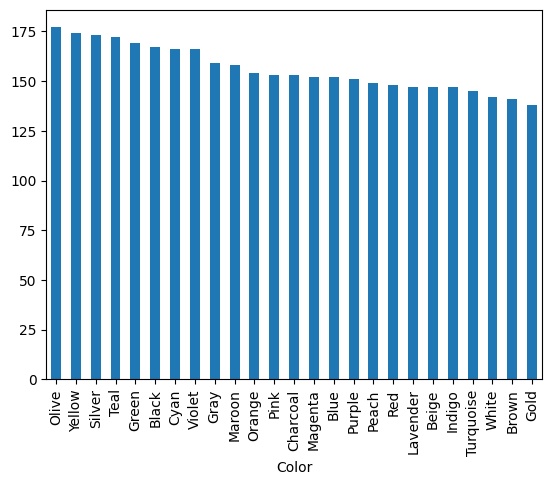

In [16]:
data['Color'].value_counts().plot(kind = 'bar')
plt.show()

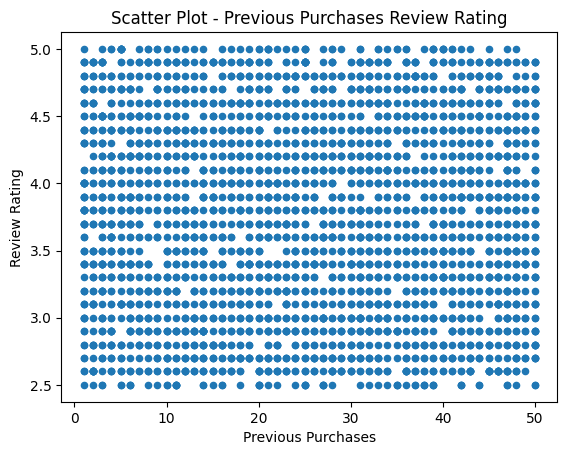

In [17]:
data.plot(x = 'Previous Purchases', y = 'Review Rating', kind = 'scatter')
plt.title('Scatter Plot - Previous Purchases Review Rating')
plt.show()

In [18]:
data.groupby('Season')['Purchase Amount (USD)'].sum()

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

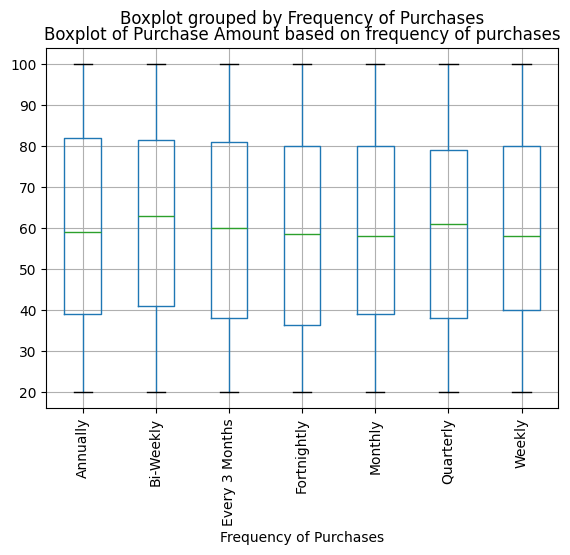

In [19]:
data.boxplot(column = 'Purchase Amount (USD)', by = 'Frequency of Purchases')
plt.title('Boxplot of Purchase Amount based on frequency of purchases')
plt.xticks(rotation = 90)
plt.show()

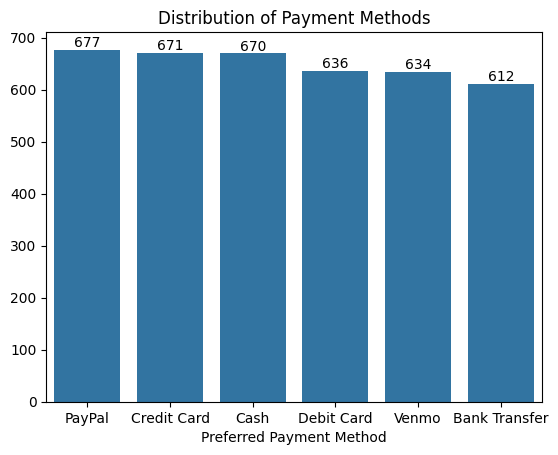

In [20]:
counts = data['Preferred Payment Method'].value_counts()

ax = sns.barplot(x=counts.index, y=counts.values)

ax.bar_label(ax.containers[0])
plt.title("Distribution of Payment Methods")
plt.show()

In [21]:
pd.pivot_table(data, values = "Purchase Amount (USD)", index = 'Location', columns = 'Item Purchased', aggfunc= 'mean').head()

Item Purchased,Backpack,Belt,Blouse,Boots,Coat,Dress,Gloves,Handbag,Hat,Hoodie,...,Scarf,Shirt,Shoes,Shorts,Skirt,Sneakers,Socks,Sunglasses,Sweater,T-shirt
Location,,,,,,,,,,,,,,,,,,,,,
Alabama,74.0,26.500000,52.0,73.666667,54.500000,55.200000,85.000000,57.666667,76.000000,53.000000,...,75.333333,48.2,54.333333,49.000000,68.666667,79.500000,93.50,62.666667,40.500000,52.50
Alaska,74.6,76.750000,67.5,56.000000,45.500000,74.500000,66.333333,46.000000,52.666667,56.500000,...,45.000000,59.5,80.000000,76.666667,87.333333,73.333333,74.25,83.000000,50.333333,56.75
Arizona,48.6,84.500000,61.0,NaN,65.333333,71.000000,87.000000,58.666667,87.000000,66.666667,...,53.500000,80.0,87.000000,46.000000,68.500000,78.500000,61.00,66.000000,70.400000,62.00
Arkansas,90.0,55.000000,66.0,50.000000,54.250000,62.800000,64.333333,50.000000,35.000000,55.250000,...,67.500000,59.0,59.500000,95.000000,44.500000,69.000000,60.50,56.000000,71.500000,52.00
California,57.4,61.666667,39.5,62.500000,55.000000,58.428571,53.000000,65.250000,49.000000,56.000000,...,54.500000,42.8,NaN,63.333333,56.000000,73.000000,83.00,69.400000,42.000000,69.00


In [22]:
data.groupby('Size')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Size
S     61.037707
XL    60.090909
M     59.924217
L     58.563153
Name: Purchase Amount (USD), dtype: float64

In [23]:
data.groupby('Payment Method')['Purchase Amount (USD)'].sum().sort_values(ascending= False)

Payment Method
Credit Card      42567
Venmo            39991
Cash             38833
PayPal           37449
Bank Transfer    37123
Debit Card       37118
Name: Purchase Amount (USD), dtype: int64

In [24]:
data.groupby('Discount Applied')['Review Rating'].mean()

Discount Applied
No     3.757715
Yes    3.739654
Name: Review Rating, dtype: float64

In [25]:
data.groupby('Color')['Category'].value_counts()

Color   Category   
Beige   Clothing       65
        Accessories    44
        Footwear       24
        Outerwear      14
Black   Clothing       81
                       ..
White   Outerwear      15
Yellow  Clothing       75
        Accessories    56
        Footwear       30
        Outerwear      13
Name: count, Length: 100, dtype: int64

In [26]:
data.groupby('Frequency of Purchases')['Previous Purchases'].median()

Frequency of Purchases
Annually          24.0
Bi-Weekly         24.0
Every 3 Months    24.0
Fortnightly       26.0
Monthly           25.0
Quarterly         28.0
Weekly            26.0
Name: Previous Purchases, dtype: float64

In [27]:
data.groupby('Season')['Review Rating'].mean()

Season
Fall      3.729949
Spring    3.790591
Summer    3.725654
Winter    3.752111
Name: Review Rating, dtype: float64

Text(0.5, 1.0, 'Count of Purchases in Each Season')

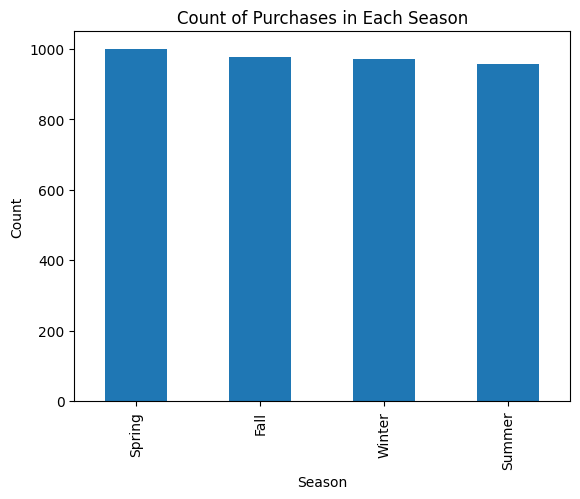

In [28]:
data['Season'].value_counts().plot(kind = 'bar')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count of Purchases in Each Season')


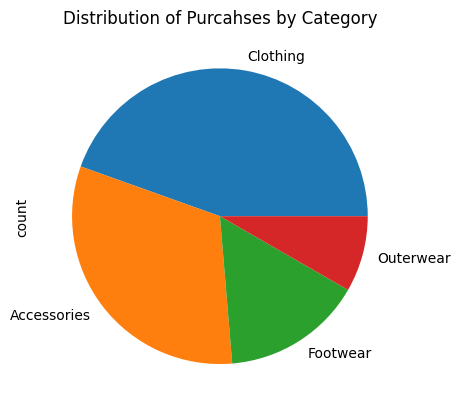

In [29]:
data['Category'].value_counts().plot(kind = 'pie')
plt.title('Distribution of Purcahses by Category')
plt.show()

Text(0.5, 1.0, 'Review Rating Distribution by Gender')

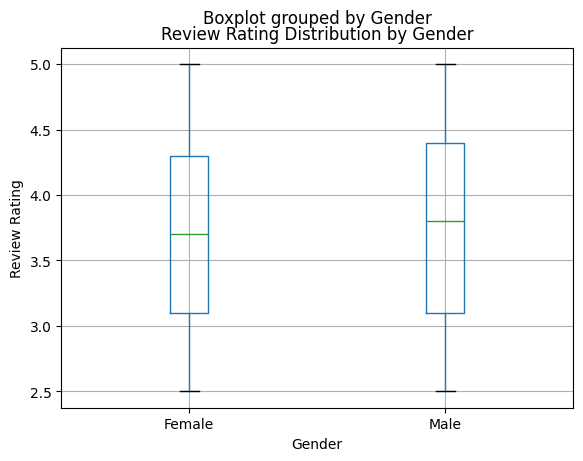

In [30]:
data.boxplot(column = 'Review Rating', by = 'Gender')
plt.xlabel('Gender')
plt.ylabel('Review Rating')
plt.title('Review Rating Distribution by Gender')

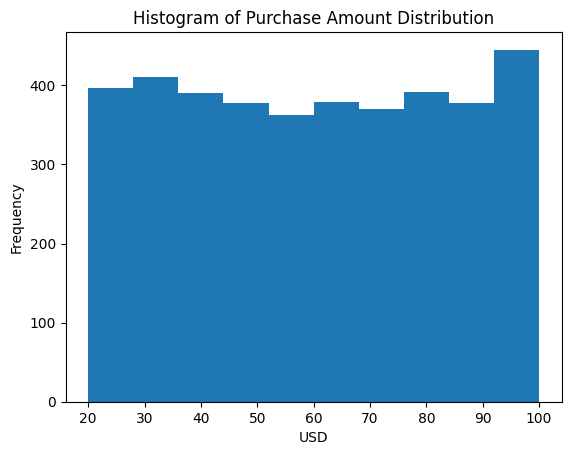

In [31]:
data['Purchase Amount (USD)'].plot(kind = 'hist', bins = 10)
plt.xlabel('USD')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amount Distribution')
plt.show()

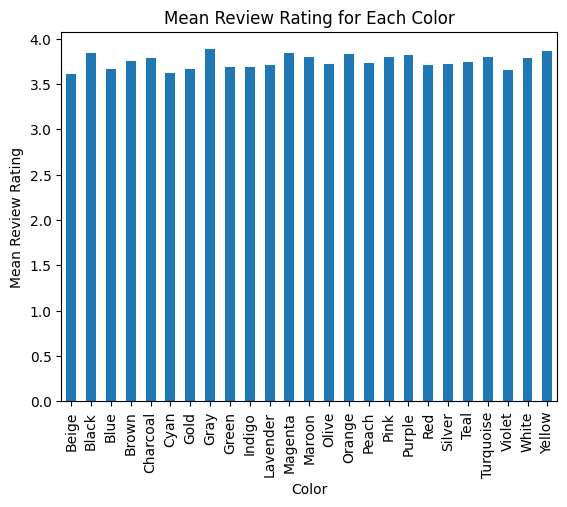

In [32]:
data.groupby('Color')['Review Rating'].mean().plot(kind = 'bar')
plt.xlabel('Color')
plt.ylabel('Mean Review Rating')
plt.title('Mean Review Rating for Each Color')
plt.show()

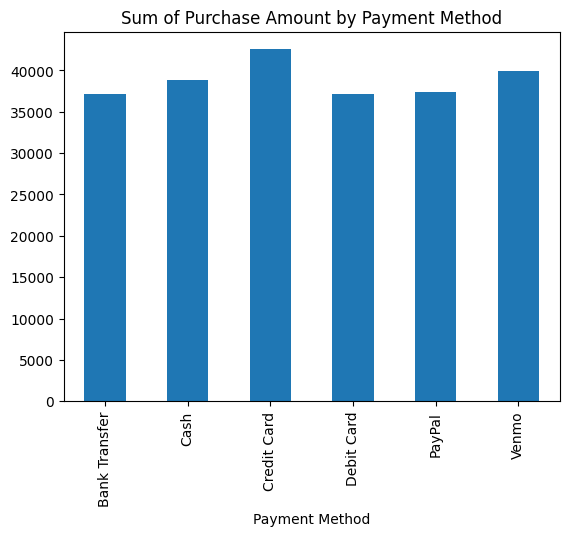

In [35]:
data.groupby('Payment Method')['Purchase Amount (USD)'].sum().plot(kind = 'bar')
plt.title('Sum of Purchase Amount by Payment Method')
plt.show()

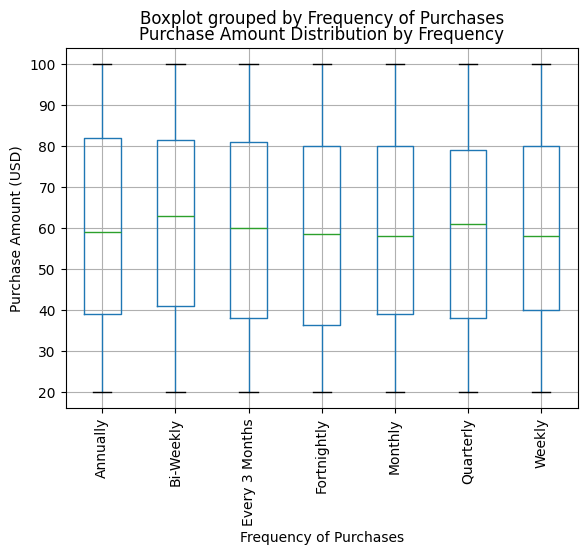

In [38]:
data.boxplot(column = 'Purchase Amount (USD)', by = "Frequency of Purchases")
plt.xlabel('Frequency of Purchases')
plt.ylabel('Purchase Amount (USD)')
plt.title('Purchase Amount Distribution by Frequency')
plt.xticks(rotation = 90)
plt.show()

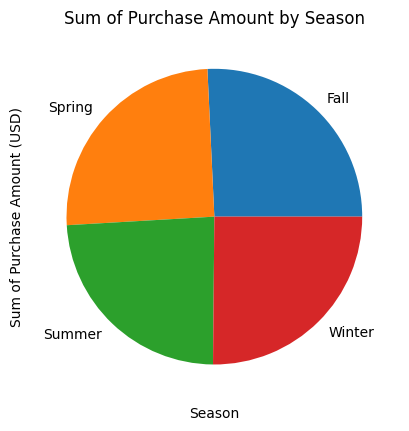

In [40]:
data.groupby('Season')['Purchase Amount (USD)'].sum().plot(kind = 'pie')
plt.xlabel('Season')
plt.ylabel('Sum of Purchase Amount (USD)')
plt.title('Sum of Purchase Amount by Season')
plt.show()